In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.getcwd())

/Users/61310joy/PSA_Model/EDA


# Data Input

In [28]:
df1 = pd.read_csv("../data/extracted_data/splits/merged_loans_part_1.csv")
df2 = pd.read_csv("../data/extracted_data/splits/merged_loans_part_2.csv")
df3 = pd.read_csv("../data/extracted_data/splits/merged_loans_part_3.csv")

/var/folders/qw/h2s12w2524z6vtfqym33s89m0000gn/T/ipykernel_24889/243753499.py:1: DtypeWarning: Columns (26,27,28,31,54,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("../data/extracted_data/splits/merged_loans_part_1.csv")
/var/folders/qw/h2s12w2524z6vtfqym33s89m0000gn/T/ipykernel_24889/243753499.py:2: DtypeWarning: Columns (26,28,34,54,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("../data/extracted_data/splits/merged_loans_part_2.csv")
/var/folders/qw/h2s12w2524z6vtfqym33s89m0000gn/T/ipykernel_24889/243753499.py:3: DtypeWarning: Columns (34,37,38,54,55,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("../data/extracted_data/splits/merged_loans_part_3.csv")


In [29]:
df = pd.concat([df1, df2, df3], ignore_index=True)
print(df.shape)

(20323119, 63)


In [30]:
df.columns

Index(['Unnamed: 0', 'Credit Score', 'First Payment Date',
       'First Time Homebuyer Flag', 'Maturity Date',
       'Metropolitan Statistical Area (MSA) Or Metropolitan Division',
       'Mortgage Insurance Percentage (MI %)', 'Number of Units',
       'Occupancy Status', 'Original Combined Loan-to-Value (CLTV)',
       'Original Debt-to-Income (DTI) Ratio', 'Original UPB',
       'Original Loan-to-Value (LTV)', 'Original Interest Rate', 'Channel',
       'Prepayment Penalty Mortgage (PPM) Flag',
       'Amortization Type (Formerly Product Type)', 'Property State',
       'Property Type', 'Postal Code', 'Loan Purpose', 'Original Loan Term',
       'Number of Borrowers', 'Seller Name', 'Servicer Name',
       'Super Conforming Flag', 'Pre-HARP Loan Sequence Number',
       'Special Eligibility Program', 'HARP Indicator',
       'Property Valuation Method', 'Interest Only (I/O) Indicator',
       'Mortgage Insurance Cancellation Indicator', 'Monthly Reporting Period',
       'Current 

In [31]:
df.rename(columns={
    "Unnamed: 0": "Loan Sequence Number",
}, inplace=True)
keep_cols = [
    "Loan Sequence Number",
    "Interest Bearing UPB",
    "Current Actual UPB",
    "Current Interest Rate",
    "Current Loan Delinquency Status",
    "Loan Age",
    "Zero Balance Code",
    "Original UPB",
    "Original Interest Rate",
    "Amortization Type (Formerly Product Type)",
    "Original Loan Term"
]
df = df[keep_cols]
df.shape

(20323119, 11)

In [32]:
df.head(20)

,Loan Sequence Number,Interest Bearing UPB,Current Actual UPB,Current Interest Rate,Current Loan Delinquency Status,Loan Age,Zero Balance Code,Original UPB,Original Interest Rate,Amortization Type (Formerly Product Type),Original Loan Term
0,F14Q10000001,0.00,0.00,3.875,0,74,1.0,324000,3.875,FRM,180
1,F14Q10000002,0.00,0.00,3.375,0,40,1.0,65000,3.375,FRM,180
2,F14Q10000003,0.00,0.00,3.375,0,75,1.0,182000,3.375,FRM,180
3,F14Q10000004,84852.01,84852.01,5.250,0,132,NaN,107000,5.250,FRM,360
4,F14Q10000005,0.00,0.00,4.125,3,47,1.0,165000,4.125,FRM,360
5,F14Q10000006,59812.31,59812.31,4.500,0,133,NaN,78000,4.500,FRM,360
6,F14Q10000007,0.00,0.00,3.625,0,70,1.0,153000,3.625,FRM,180
7,F14Q10000008,104785.65,104785.65,4.750,0,133,NaN,139000,4.750,FRM,360
8,F14Q10000009,0.00,0.00,4.625,0,66,1.0,76000,4.625,FRM,360
9,F14Q10000010,110041.59,110041.59,4.625,0,131,NaN,141000,4.625,FRM,360


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20323119 entries, 0 to 20323118
Data columns (total 11 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   Loan Sequence Number                       object 
 1   Interest Bearing UPB                       float64
 2   Current Actual UPB                         float64
 3   Current Interest Rate                      float64
 4   Current Loan Delinquency Status            object 
 5   Loan Age                                   int64  
 6   Zero Balance Code                          float64
 7   Original UPB                               int64  
 8   Original Interest Rate                     float64
 9   Amortization Type (Formerly Product Type)  object 
 10  Original Loan Term                         int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.7+ GB


## Data Cleaning 

In [34]:
missing_report = df.isnull().sum().to_frame("Missing Count")
missing_report["Missing %"] = (missing_report["Missing Count"] / len(df)) * 100
missing_report.sort_values("Missing Count", ascending=False)

,Missing Count,Missing %
Zero Balance Code,11640345,57.276371
Loan Sequence Number,0,0.000000
Interest Bearing UPB,0,0.000000
Current Actual UPB,0,0.000000
Current Interest Rate,0,0.000000
Current Loan Delinquency Status,0,0.000000
Loan Age,0,0.000000
Original UPB,0,0.000000
Original Interest Rate,0,0.000000
Amortization Type (Formerly Product Type),0,0.000000


## EDA

In [ ]:
cat_cols = [
    "Loan Sequence Number", 
    "Current Loan Delinquency Status",
    "Zero Balance Code",
    "Amortization Type (Formerly Product Type)"
]

for c in cat_cols:
    print(df[c].value_counts().head(10))
    df[c].value_counts().plot(kind="bar", title=c, figsize=(6,4))


array([[<Axes: title={'center': 'Interest Bearing UPB'}>,
        <Axes: title={'center': 'Current Actual UPB'}>,
        <Axes: title={'center': 'Current Interest Rate'}>],
       [<Axes: title={'center': 'Loan Age'}>,
        <Axes: title={'center': 'Original UPB'}>,
        <Axes: title={'center': 'Original Interest Rate'}>],
       [<Axes: title={'center': 'Original Loan Term'}>, <Axes: >,
        <Axes: >]], dtype=object)

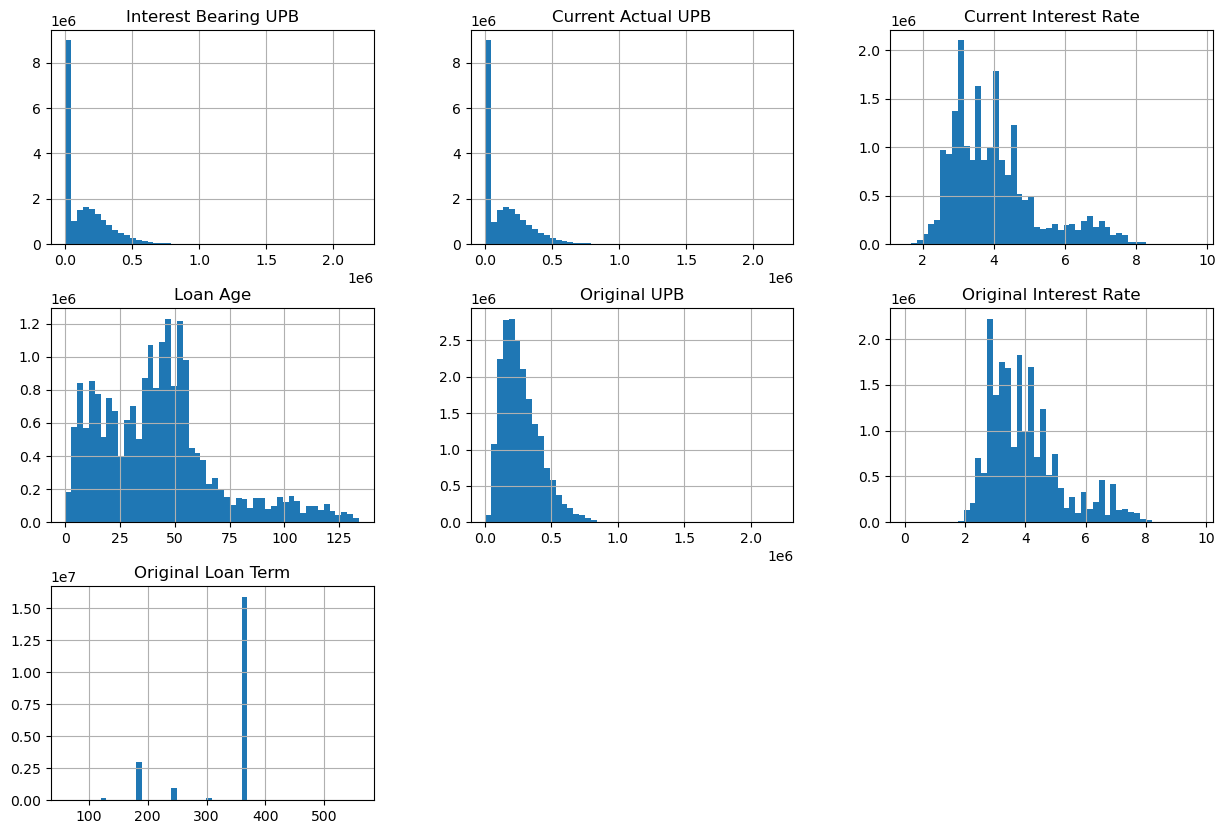

In [35]:
num_cols = [
    "Interest Bearing UPB", "Current Actual UPB", "Current Interest Rate",
    "Loan Age", "Original UPB", "Original Interest Rate", "Original Loan Term"
]

df[num_cols].hist(bins=50, figsize=(15,10))


<Axes: >

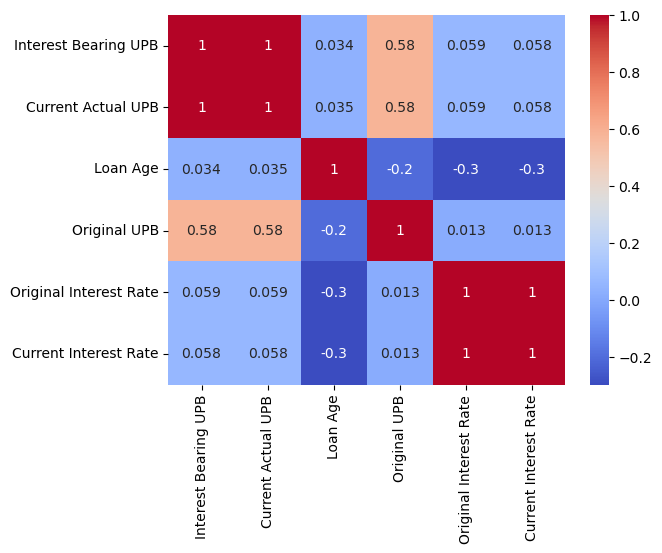

In [36]:
corr = df[[
    "Interest Bearing UPB", "Current Actual UPB", "Loan Age",
    "Original UPB", "Original Interest Rate", "Current Interest Rate"
]].corr()

import seaborn as sns
sns.heatmap(corr, annot=True, cmap="coolwarm")
